## Step1: Problem statement

### Objective:
The objective of this EDA project is to analyze an energy consumption dataset to discover patterns, trends, and insights that can help in understanding energy usage behavior over time. We aim to:

* Identify peak consumption periods.
* Analyze seasonal variations in energy usage.
* Understand the relationship between energy consumption and external factors (e.g., temperature).

### Research Questions:
1. What are the peak hours, days, and months for energy consumption?
2. How does energy consumption vary seasonally?
3. What is the relationship between energy consumption and external factors like temperature?

## Step 2: Collect Data

### Data Source:
We will use the "Household Power Consumption" dataset from the UCI Machine Learning Repository. This dataset contains measurements of electric power consumption in one household over a period of almost 4 years.

### Dataset Information:
* Link: [Household Power Consumption Dataset](https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption)
* Attributes:
    * ``Date``: Date in format dd/mm/yyyy
    * ``Time``: Time in format hh:mm
    * ``Global_active_power``: Household global minute-averaged active power (in kilowatt)
    * ``Global_reactive_power``: Household global minute-averaged reactive power (in kilowatt)
    * ``Voltage``: Minute-averaged voltage (in volt)
    * ``Global_intensity``: Household global minute-averaged current intensity (in ampere)
    * ``Sub_metering_1``: Energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven, and a microwave (hot plates are not electric but gas-powered).
    * ``Sub_metering_2``: Energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing machine, a tumble-drier, a refrigerator, and a light.
    * ``Sub_metering_3``: Energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water heater and an air conditioner.

### Download and Load Data:

In [1]:
!pip install matplotlib pandas seaborn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import requests
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip'
data_path = 'household_power_consumption.txt'

# Download and extract the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip'
save_path = './'
zip_file_name = 'household_power_consumption.zip'
extracted_file_name = 'household_power_consumption.txt'

# Download file
response = requests.get(url)
with open(os.path.join(save_path, zip_file_name), 'wb') as file:
    file.write(response.content)

# Extract file
with zipfile.ZipFile(os.path.join(save_path, zip_file_name), 'r') as zip_ref:
    zip_ref.extractall(save_path)

# Rename extracted file
os.rename(os.path.join(save_path, 'household_power_consumption.txt'), os.path.join(save_path, extracted_file_name))

# Optional: Remove the zip file after extraction
os.remove(os.path.join(save_path, zip_file_name))

In [4]:
# Read the data into a DataFrame
data_path = 'household_power_consumption.txt'
df = pd.read_csv(data_path, sep=';', 
                 parse_dates={'datetime': ['Date', 'Time']},
                 infer_datetime_format=True, 
                 na_values=['nan','?'], 
                 low_memory=False)
df['datetime'] = pd.to_datetime(df['datetime'])
print(df.head())
#df.set_index('date', inplace=True)

C:\Users\Confidence.Oko-jaja\AppData\Local\Temp\ipykernel_28744\3761678557.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(data_path, sep=';',
C:\Users\Confidence.Oko-jaja\AppData\Local\Temp\ipykernel_28744\3761678557.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(data_path, sep=';',
C:\Users\Confidence.Oko-jaja\AppData\Local\Temp\ipykernel_28744\3761678557.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(data_path, sep=';',


             datetime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [5]:
# Display the first few rows of the dataset
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0



### Step 3: Understand the Data
Now that we've loaded the data, the next step is to understand the dataset by performing some initial exploration. This involves summarizing the data, checking for missing values, and visualizing the data to get a sense of its structure and contents.

#### Summarize the Data
We will start by examining the structure of the dataset and generating some basic statistics.

In [6]:
# Display the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [7]:
# Display basic statistics
df.describe()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-06 07:12:59.999994112,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:18:30,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 07:13:00,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 14:07:30,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


#### Check for Missing Values
It's important to check for missing values and understand their distribution within the dataset.

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


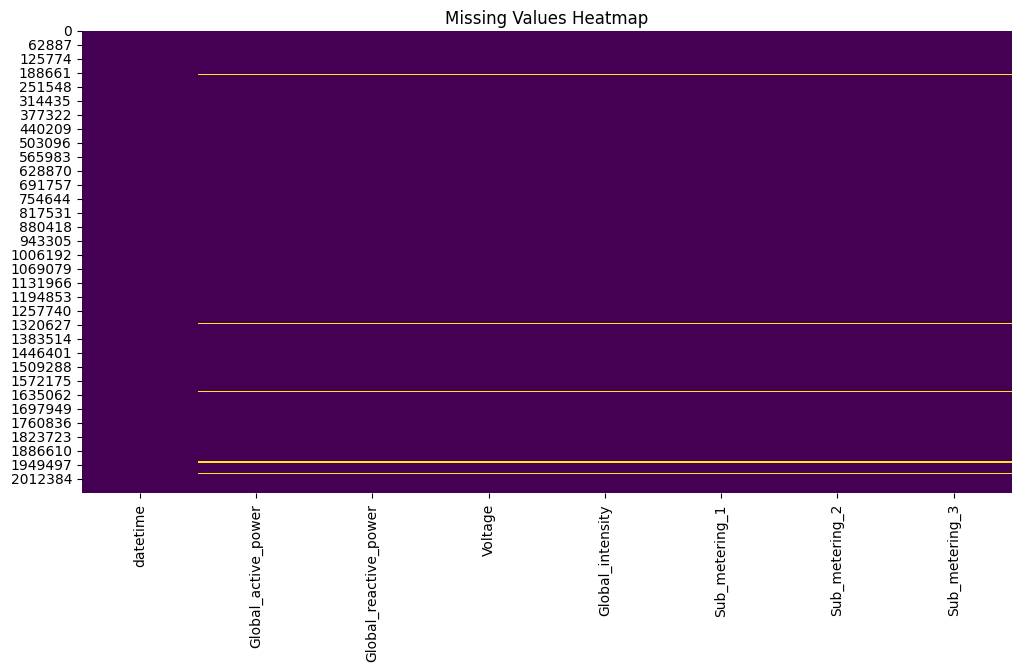

In [9]:
# Visualize missing values using a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

#### Visualize Data Distribution
Next, we will visualize the distribution of the main numerical variables to understand their ranges and any potential issues.

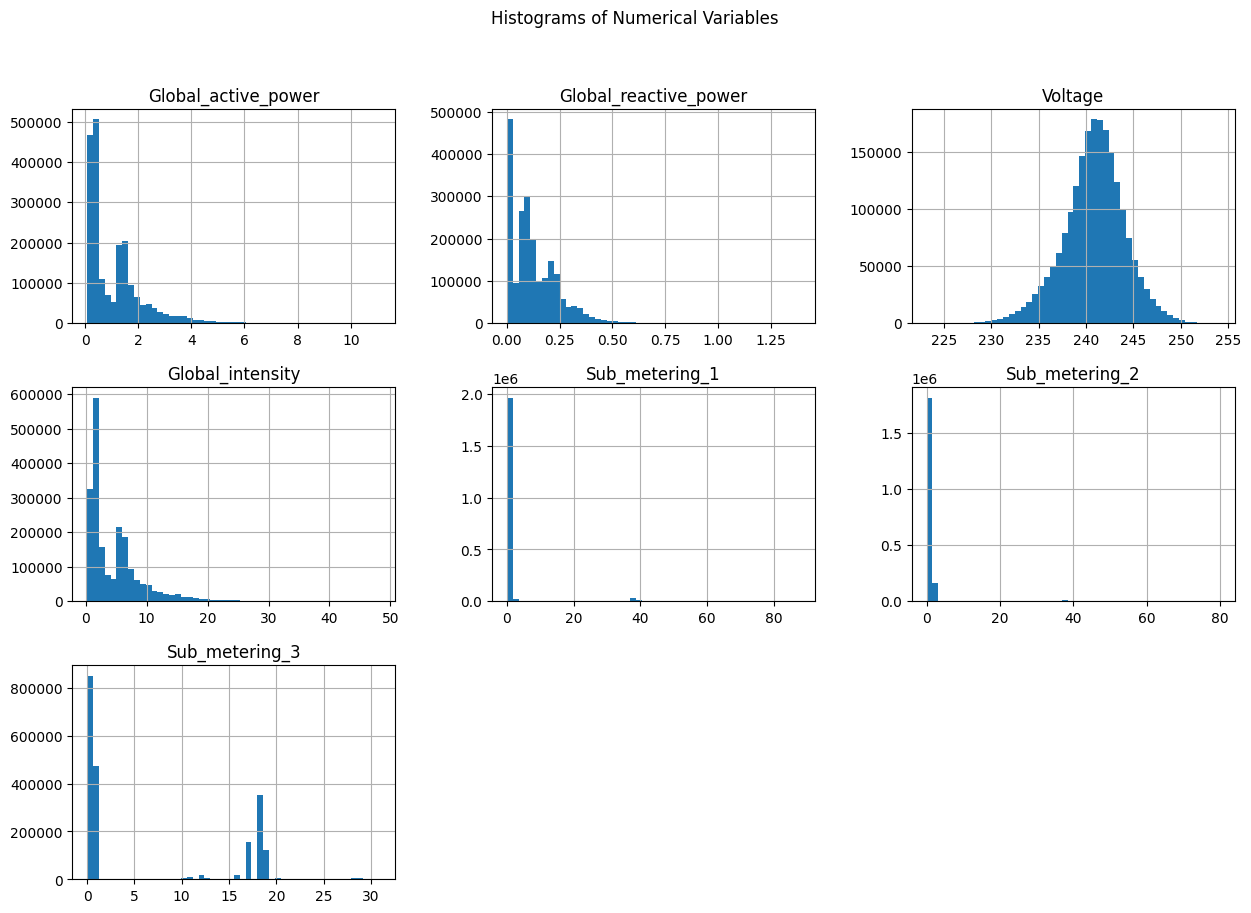

In [10]:
# Histogram for numerical variables
numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

df[numerical_cols].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Variables')
plt.show()

#### Visualize Time Series Data
Since this dataset contains time series data, it is useful to visualize the main variables over time to observe any trends or patterns.

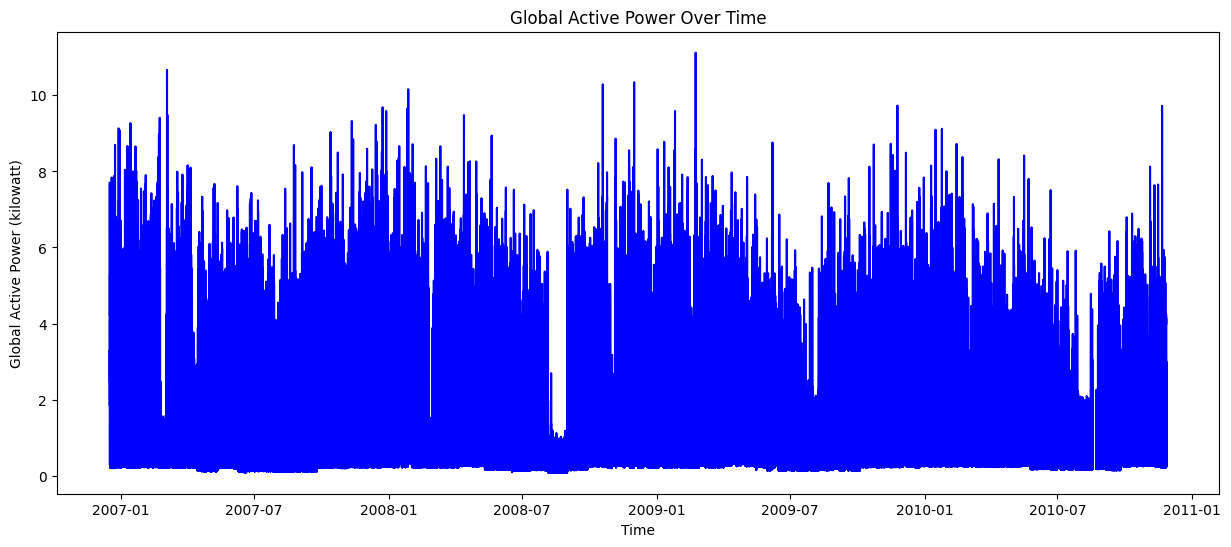

In [11]:
# Set the datetime column as the index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)


# Plot Global Active Power over time
plt.figure(figsize=(15, 6))
plt.plot(df['Global_active_power'], color='blue')
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatt)')
plt.show()

### Step 4: Data Cleaning
In this step, we will clean the data by handling missing values, dealing with inconsistencies, and preparing the data for further analysis.

#### Handling Missing Values
First, let's analyze and handle the missing values in our dataset.

In [12]:
# Display the number of missing values in each column again for reference
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)



Missing values in each column:
 Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [13]:
# Percentage of missing values in each column
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values in each column:\n", missing_percentage)



Percentage of missing values in each column:
 Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64


Based on the percentage of missing values, we can decide how to handle them. Common strategies include:

* Dropping rows with missing values.
* Filling missing values with a placeholder (e.g., mean, median, or mode).
For this project, we will fill missing values with the mean of the respective columns.

In [14]:
# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Verify that there are no more missing values
print("\nMissing values after filling:\n", df.isnull().sum())


Missing values after filling:
 Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


#### Dealing with Inconsistencies
Next, we will check for any inconsistencies in the data, such as negative values for variables that should only have positive values (e.g., power consumption).

In [15]:
# Check for negative values in numerical columns
negative_values = df[numerical_cols] < 0
print("\nNegative values in numerical columns:\n", negative_values.sum())




Negative values in numerical columns:
 Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [16]:
# Convert columns to appropriate data types if necessary
# For example, converting sub-metering columns to integers
df['Sub_metering_1'] = df['Sub_metering_1'].astype(int)
df['Sub_metering_2'] = df['Sub_metering_2'].astype(int)
df['Sub_metering_3'] = df['Sub_metering_3'].astype(int)

# Verify data types
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         int32  
 5   Sub_metering_2         int32  
 6   Sub_metering_3         int32  
dtypes: float64(4), int32(3)
memory usage: 102.9 MB


### Step 5: Feature Engineering
In this step, we will create new features that can help us in our exploratory analysis and provide deeper insights into the data. We will also aggregate the data to different time granularities for better analysis.

#### Create New Features
Let's start by creating new features such as day of the week, month, and season.

In [17]:
# Create new features: day of the week, month, and year
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour

In [18]:
# Create a feature for season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['season'] = df['month'].apply(get_season)

# Display the first few rows to verify the new features
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,day_of_week,hour,season
datetime,,,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0,1,17,2006,12,16,5,17,Winter
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0,1,16,2006,12,16,5,17,Winter
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0,2,17,2006,12,16,5,17,Winter
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0,1,17,2006,12,16,5,17,Winter
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0,1,17,2006,12,16,5,17,Winter


#### Aggregate Data
We will aggregate the data to different time granularities (e.g., hourly, daily) to facilitate analysis.

In [19]:
# Aggregate data to hourly mean value
new_cols = ['year', 'month', 'day', 'day_of_week', 'hour',
       'season']
df_hourly = df.loc[:, ~df.columns.isin(new_cols)].resample('H').mean()

# Aggregate data to daily mean values
df_daily = df.loc[:, ~df.columns.isin(new_cols)].resample('D').mean()

# Display the first few rows of the aggregated data
df_hourly.head()


C:\Users\Confidence.Oko-jaja\AppData\Local\Temp\ipykernel_28744\3914914071.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.loc[:, ~df.columns.isin(new_cols)].resample('H').mean()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [20]:
df_daily.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972


### Step 6: Exploratory Analysis
With the new features created and data aggregated, we are ready to perform detailed exploratory analysis.

Let's proceed with the exploratory analysis.

#### A. Identify Peak Consumption Periods
We will analyze and visualize energy consumption by hour, day of the week, and month.

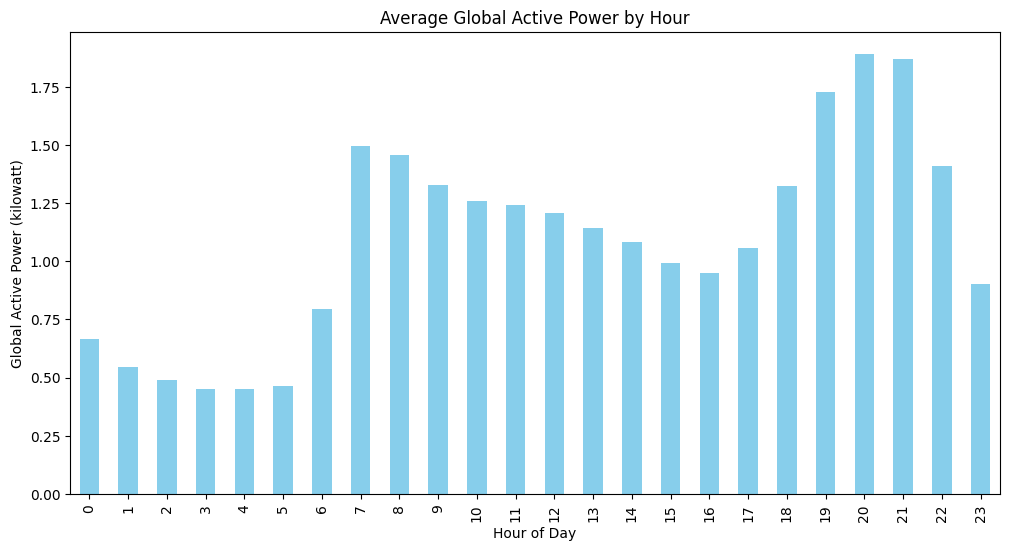

In [21]:
# Average energy consumption by hour
hourly_avg = df_hourly.groupby(df_hourly.index.hour)['Global_active_power'].mean()

plt.figure(figsize=(12, 6))
hourly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Global Active Power by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Global Active Power (kilowatt)')
plt.show()


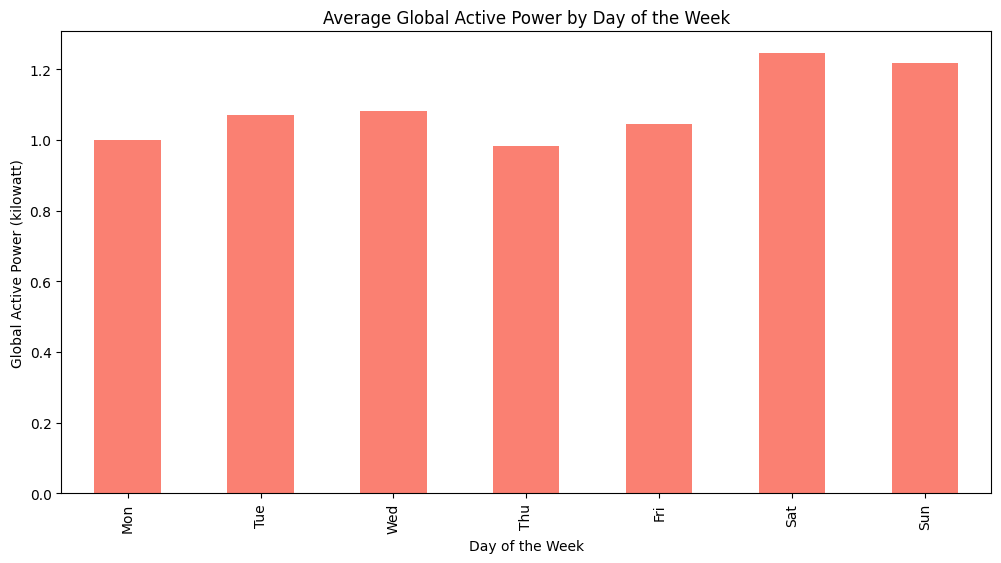

In [22]:
# Average energy consumption by day of the week
daily_avg = df.groupby('day_of_week')['Global_active_power'].mean()

plt.figure(figsize=(12, 6))
daily_avg.plot(kind='bar', color='salmon')
plt.title('Average Global Active Power by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Global Active Power (kilowatt)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


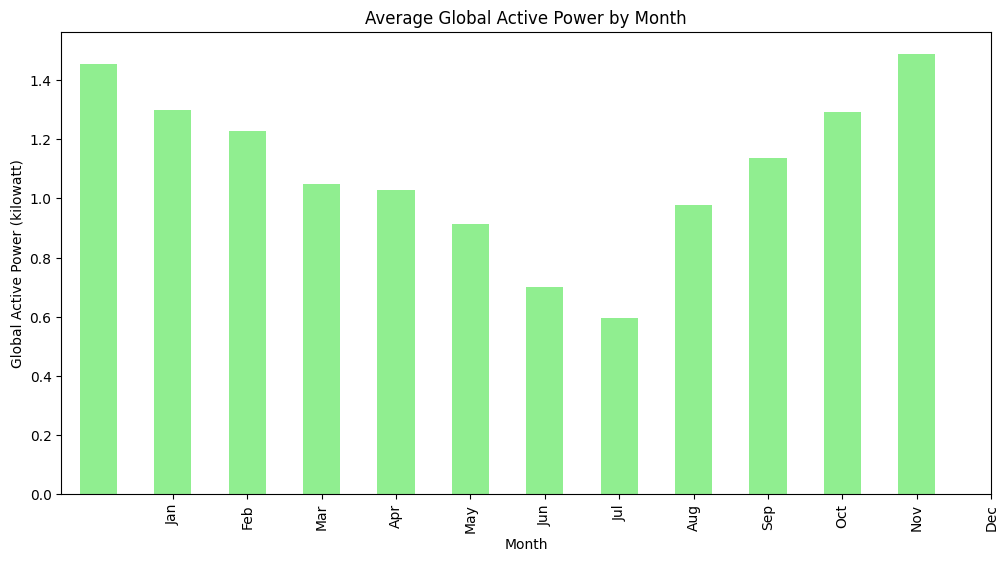

In [23]:
# Average energy consumption by month
monthly_avg = df.groupby('month')['Global_active_power'].mean()

plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='bar', color='lightgreen')
plt.title('Average Global Active Power by Month')
plt.xlabel('Month')
plt.ylabel('Global Active Power (kilowatt)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


#### B. Analyze Seasonal Variations
We will visualize energy consumption across different seasons.

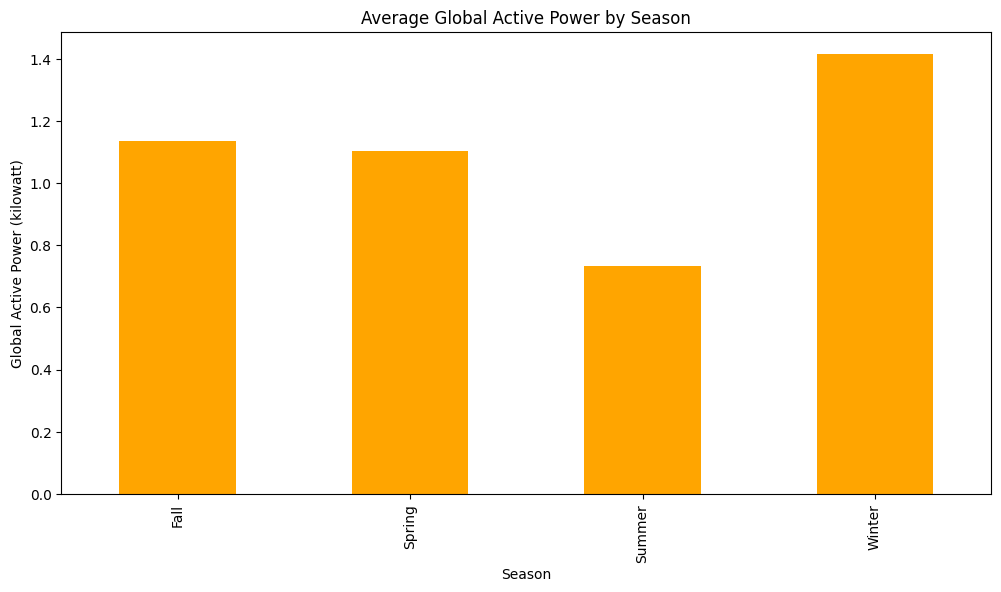

In [24]:
# Average energy consumption by season
seasonal_avg = df.groupby('season')['Global_active_power'].mean()

plt.figure(figsize=(12, 6))
seasonal_avg.plot(kind='bar', color='orange')
plt.title('Average Global Active Power by Season')
plt.xlabel('Season')
plt.ylabel('Global Active Power (kilowatt)')
plt.show()


### Conclusion
This completes our exploratory analysis. We have identified peak consumption periods by hour, day of the week, and month, and analyzed seasonal variations in energy consumption.

Based on the analysis of the energy consumption dataset, we can draw the following conclusions:

#### 1. Peak Consumption Periods:

    * Energy consumption tends to peak during the evening hours, particularly between 19:00 and 22:00 (7:00 PM - 10:00 PM), indicating higher usage during these times.
    * There is a noticeable drop in energy consumption during the early morning hours, suggesting lower usage during late night and early morning periods.
    
#### 2. Day of the Week:
    * Energy consumption shows variation based on the day of the week. Consumption is generally higher during weekends (Saturday and Sunday) compared to weekdays (Monday to Friday).
    * There is a slight increase in energy consumption on weekdays, peaking on Tueday and Wednesday, and then decreasing towards the weekend.
    
#### 3. Monthly Consumption:

    * Energy consumption varies by month, with higher consumption during the late fall and winter months (November, December, January, February) and lower consumption during the summer months (May, June, July). This pattern is consistent with seasonal changes in energy usage, where heating and lighting requirements are higher during colder months.
    
#### 4. Seasonal Variations:

    * Energy consumption is highest during the winter season, followed by fall, spring, and summer, in that order. This aligns with the seasonal patterns observed in monthly consumption, with winter months having higher energy demands due to heating requirements.

The dataset shows clear patterns in energy consumption based on time of day, day of the week, month, and season, highlighting the importance of understanding these trends for effective energy management and resource planning.

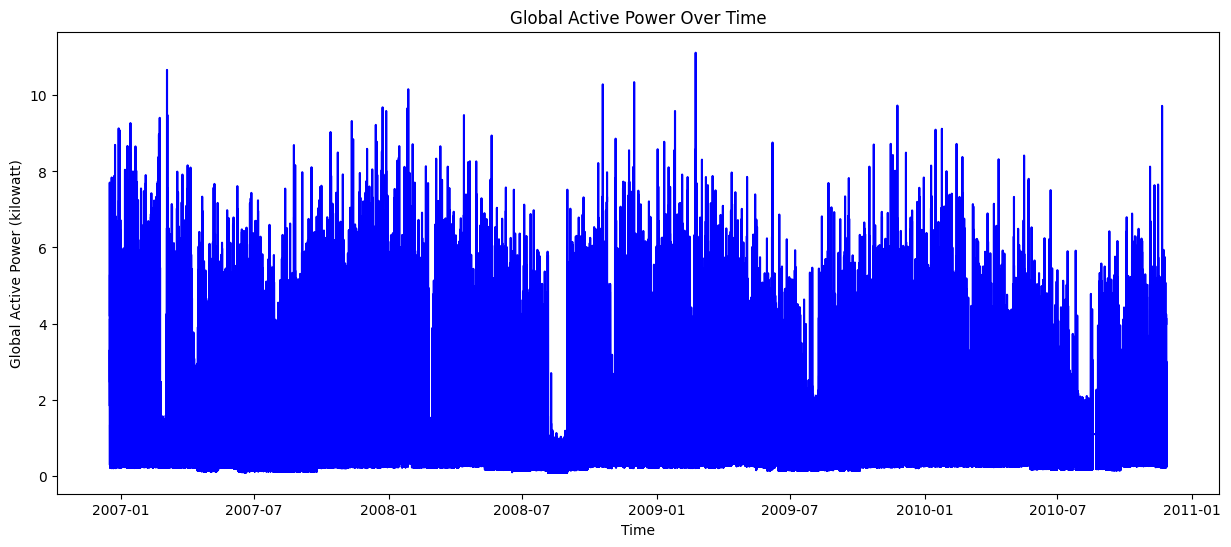

In [28]:
# Set the datetime column as the index
#df['datetime'] = pd.to_datetime(df['datetime'])
#df.set_index('datetime', inplace=True)


# Plot Global Active Power over time
plt.figure(figsize=(15, 6))
plt.plot(df['Global_active_power'], color='blue')
plt.title('Global Active Power Over Time')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kilowatt)')
plt.savefig("energy_consumption_data.png")